In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [64]:
train0 = pd.read_csv('train_HK6lq50.csv')
test0 = pd.read_csv('test_2nAIblo.csv')

In [65]:
train0.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [66]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
id                           73147 non-null object
program_id                   73147 non-null object
program_type                 73147 non-null object
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null object
difficulty_level             73147 non-null object
trainee_id                   73147 non-null int64
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          45418 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null object
trainee_engagement_rating    73070 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 8.9+ MB


In [67]:
test0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 15 columns):
id                           31349 non-null object
program_id                   31349 non-null object
program_type                 31349 non-null object
program_duration             31349 non-null int64
test_id                      31349 non-null int64
test_type                    31349 non-null object
difficulty_level             31349 non-null object
trainee_id                   31349 non-null int64
gender                       31349 non-null object
education                    31349 non-null object
city_tier                    31349 non-null int64
age                          19558 non-null float64
total_programs_enrolled      31349 non-null int64
is_handicapped               31349 non-null object
trainee_engagement_rating    31318 non-null float64
dtypes: float64(2), int64(5), object(8)
memory usage: 3.6+ MB


In [68]:
train0.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,73147.000000,73147.000000,73147.000000,73147.000000,45418.000000,73147.000000,73070.000000,73147.000000
mean,128.208676,91.079306,9843.079620,2.246845,36.494033,2.583934,2.395634,0.695408
std,6.889679,51.239048,5703.556093,1.011587,9.041119,1.240816,1.325288,0.460238
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5040.000000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,90.000000,9641.000000,2.000000,39.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14552.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20098.000000,4.000000,63.000000,14.000000,5.000000,1.000000


In [69]:
train0[['program_id','is_pass']].groupby(['program_id'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,program_id,is_pass
12,X_1,0.839140
14,X_3,0.801660
13,X_2,0.789406
15,Y_1,0.787049
18,Y_4,0.776203
16,Y_2,0.747937
5,T_4,0.742279
17,Y_3,0.742111
3,T_2,0.740506
4,T_3,0.734315


In [70]:
train0[['program_type','is_pass']].groupby(['program_type'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,program_type,is_pass
4,X,0.814002
5,Y,0.764096
6,Z,0.720772
1,T,0.698721
2,U,0.625240
3,V,0.585873
0,S,0.546003


In [71]:
train0[['test_type','is_pass']].groupby(['test_type'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,test_type,is_pass
1,online,0.779996
0,offline,0.637898


In [72]:
train0[['difficulty_level','is_pass']].groupby(['difficulty_level'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,difficulty_level,is_pass
0,easy,0.737189
1,hard,0.667573
2,intermediate,0.654877
3,vary hard,0.430562


In [73]:
train0[['gender','is_pass']].groupby(['gender'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,gender,is_pass
1,M,0.704172
0,F,0.685374


In [74]:
train0[['education','is_pass']].groupby(['education'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,education,is_pass
2,Masters,0.833984
0,Bachelors,0.742509
1,High School Diploma,0.714789
3,Matriculation,0.648592
4,No Qualification,0.583658


In [75]:
train0[['city_tier','is_pass']].groupby(['city_tier'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,city_tier,is_pass
0,1,0.732702
1,2,0.696994
2,3,0.683879
3,4,0.617070


In [76]:
train0[['trainee_engagement_rating','is_pass']].groupby(['trainee_engagement_rating'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,trainee_engagement_rating,is_pass
4,5.0,0.862422
3,4.0,0.804393
2,3.0,0.737904
1,2.0,0.685157
0,1.0,0.591522


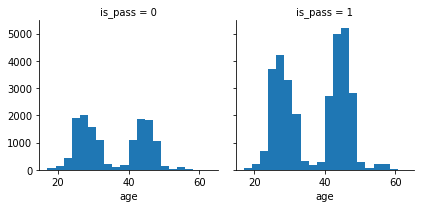

In [78]:
g = sns.FacetGrid(train0,col='is_pass')
g.map(plt.hist,'age',bins=20)

In [79]:
train0.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


/usr/local/lib/python3.4/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.4/dist-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


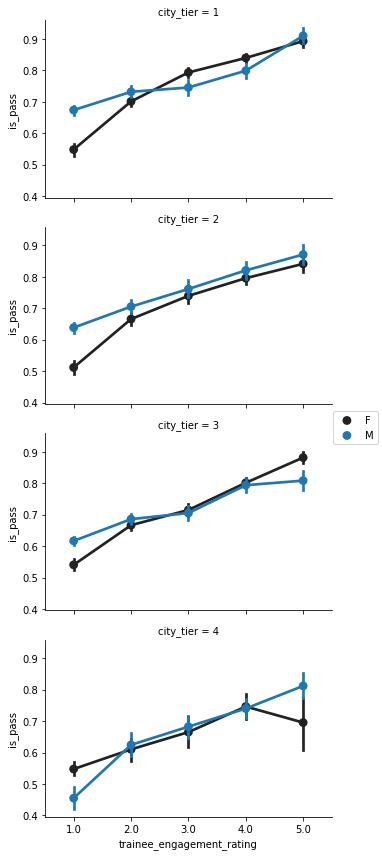

In [81]:
grid = sns.FacetGrid(train0,row ='city_tier',size = 3,aspect = 1.6)
grid.map(sns.pointplot, 'trainee_engagement_rating','is_pass','gender')
grid.add_legend()

In [82]:
train0.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [83]:
train2 = train0.drop(['id','test_id','trainee_id','is_handicapped','total_programs_enrolled'],axis =1)

In [84]:
train2 = train2.drop(['program_duration'],axis =1)

In [85]:
test2 = test0.drop(['id','test_id','trainee_id','is_handicapped','total_programs_enrolled','program_duration'],axis =1)

In [86]:
train2.head()

,program_id,program_type,test_type,difficulty_level,gender,education,city_tier,age,trainee_engagement_rating,is_pass
0,Y_1,Y,offline,intermediate,M,Matriculation,3,24.0,1.0,0
1,T_1,T,offline,easy,F,High School Diploma,4,26.0,3.0,1
2,Z_2,Z,online,easy,M,Matriculation,1,40.0,2.0,1
3,T_2,T,offline,easy,F,Matriculation,3,NaN,1.0,1
4,V_3,V,offline,intermediate,F,High School Diploma,1,42.0,4.0,1


In [87]:
combine = [train2, test2]
for dataset in combine:
    dataset['gender'] = dataset['gender'].map( {'F': 1, 'M': 0} ).astype(int)

In [88]:
for dataset in combine:
    dataset['education'] = dataset['education'].map( {'No Qualification':0, 'Matriculation': 1, 'High School Diploma': 2,'Bachelors':3,'Masters':4 } ).astype(int)
    

In [93]:
train2.head().nunique()

program_id                   5
program_type                 4
test_type                    2
difficulty_level             2
gender                       2
education                    2
city_tier                    3
age                          4
trainee_engagement_rating    4
is_pass                      2
dtype: int64

In [98]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
train2['program_id'] = number.fit_transform(y = train2['program_id'].astype('str'))
test2['program_id'] = number.fit_transform(y = test2['program_id'].astype('str'))

In [101]:
train2['difficulty_level'] = number.fit_transform(y = train2['difficulty_level'].astype('str'))
test2['difficulty_level'] = number.fit_transform(y = test2['difficulty_level'].astype('str'))

In [104]:
train2['test_type'] = number.fit_transform(y = train2['test_type'].astype('str'))
test2['test_type'] = number.fit_transform(y = test2['test_type'].astype('str'))

train2.head()

,program_id,program_type,test_type,difficulty_level,gender,education,city_tier,age,trainee_engagement_rating,is_pass
0,15,Y,0,2,0,1,3,24.0,1.0,0
1,2,T,0,0,1,2,4,26.0,3.0,1
2,20,Z,1,0,0,1,1,40.0,2.0,1
3,3,T,0,0,1,1,3,NaN,1.0,1
4,10,V,0,2,1,2,1,42.0,4.0,1


In [105]:
train2['program_type'] = number.fit_transform(y = train2['program_type'].astype('str'))
test2['program_type'] = number.fit_transform(y = test2['program_type'].astype('str'))
train2.head()

,program_id,program_type,test_type,difficulty_level,gender,education,city_tier,age,trainee_engagement_rating,is_pass
0,15,5,0,2,0,1,3,24.0,1.0,0
1,2,1,0,0,1,2,4,26.0,3.0,1
2,20,6,1,0,0,1,1,40.0,2.0,1
3,3,1,0,0,1,1,3,NaN,1.0,1
4,10,3,0,2,1,2,1,42.0,4.0,1


In [106]:
train2['trainee_engagement_rating'] = number.fit_transform(y = train2['trainee_engagement_rating'].astype('float'))
test2['trainee_engagement_rating'] = number.fit_transform(y = test2['trainee_engagement_rating'].astype('float'))
train2.head()

,program_id,program_type,test_type,difficulty_level,gender,education,city_tier,age,trainee_engagement_rating,is_pass
0,15,5,0,2,0,1,3,24.0,0,0
1,2,1,0,0,1,2,4,26.0,2,1
2,20,6,1,0,0,1,1,40.0,1,1
3,3,1,0,0,1,1,3,NaN,0,1
4,10,3,0,2,1,2,1,42.0,3,1


In [112]:
train2.dropna(axis=0, how='any',inplace = True)

In [114]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45418 entries, 0 to 73146
Data columns (total 10 columns):
program_id                   45418 non-null int64
program_type                 45418 non-null int64
test_type                    45418 non-null int64
difficulty_level             45418 non-null int64
gender                       45418 non-null int64
education                    45418 non-null int64
city_tier                    45418 non-null int64
age                          45418 non-null float64
trainee_engagement_rating    45418 non-null int64
is_pass                      45418 non-null int64
dtypes: float64(1), int64(9)
memory usage: 3.8 MB


In [115]:
train2.head()

,program_id,program_type,test_type,difficulty_level,gender,education,city_tier,age,trainee_engagement_rating,is_pass
0,15,5,0,2,0,1,3,24.0,0,0
1,2,1,0,0,1,2,4,26.0,2,1
2,20,6,1,0,0,1,1,40.0,1,1
4,10,3,0,2,1,2,1,42.0,3,1
5,4,1,0,2,1,2,1,29.0,1,0


In [118]:
test2.dropna(axis=0, how='any',inplace = True)

In [119]:

svc = SVC()
Y_train = train2["is_pass"]
svc.fit(train2, Y_train)
Y_pred = svc.predict(test2)
acc_svc = round(svc.score(train2, Y_train) * 100, 2)
acc_svc


ValueError: X.shape[1] = 9 should be equal to 10, the number of features at training time